# DAT 205 Project - Transform data
## By Dennis Hung
## Version 1
## Code DRAFT 2021-03-11

## Updates
#### 


##  Reference

#### How to Get NBA Data Using the nba_api Python Module (Beginner). Retrieved from Plyaing Numbers: 

https://www.playingnumbers.com/2019/12/how-to-get-nba-data-using-the-nba_api-python-module-beginner/

#### Patel, S. (2020, August 19). swar / nba_api. Retrieved from GitHub: 

https://github.com/swar/nba_api/blob/master/docs/table_of_contents.md

#### Issues

https://github.com/swar/nba_api/issues/124



# Note: 
#### This code relies on the CSV output from "DAT 205-Group01-NBA-HistPlayGameLogs.ipynb" as the dataset for this transformation.

# Section 0: Function definitions

hms_string(sec_elapsed)


In [1]:
# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60))/60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h,m,s)

# Section 1: Import libraries

In [2]:
# Initialized required packages
# Standard packages
import numpy as np
import pandas as pd
import scipy as sp
import csv
import time

# Graphing packages
import seaborn as sns

# import matplotlib
import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
# import matplotlib.lines as mlines

# Data preparation
from sklearn.preprocessing import LabelEncoder

# Modeling packages
# import tensorflow as tf
# import sklearn as skl
from sklearn.model_selection import train_test_split

# Regression modeling
# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# from sklearn.model_selection import cross_val_score

# Confusion matrix, Accuracy, sensitivity and specificity
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

# from sklearn.feature_selection import VarianceThreshold 
from sklearn.feature_selection import RFE 
# from sklearn.feature_selection import RFECV

# Clustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Following code is being deprecated
# from sklearn.datasets.samples_generator import make_blobs

# Initialize variables if there is any debugging required
# Insert following line and activate the debugging.
# # VALIDATION CODE 
# if debug_active == 'yes':
# 
# Use "display(df)"" if the result command is "df" to retain the same format



start_time = time.time()

# Section 2: Configuration of variables

Must manually set the following variables

gameTypeListed as one of the following: 'Pre Season', 'Regular Season', 'Playoffs'

seasonsListed for the game season in this format '2015-16'. Have at least 2 values

In [3]:
debug_active = 'yes'
loop_max = 100
# showNumRecs = 15
test_size_val = 0.30
random_state_val = 42

# Setup file name for csv or Excel (.xlsx)
filename = './HistoricalGameLogs_2004-05_to_2019-20_ALL.csv'
# filename = filename + seasonStart + '_to_' + seasonEnd + '_' + gameType + '.csv'
# filename = filename + seasonStart + '_to_' + seasonEnd + '_ALL' + '.csv'


# Update player stats per game each season

gameTypeListed = ['Pre Season', 'Regular Season', 'Playoffs']

# Option 1: For all currently possible seasons
# seasonsListed = ['1946-47', '1947-48', '1948-49', '1949-50'
# , '1950-51', '1951-52', '1952-53', '1953-54', '1954-55', '1955-56', '1956-57', '1957-58', '1958-59', '1959-60'
# , '1960-61', '1961-62', '1962-63', '1963-64', '1964-65', '1965-66', '1966-67', '1967-68', '1968-69', '1969-70'
# , '1970-71', '1971-72', '1972-73', '1973-74', '1974-75', '1975-76', '1976-77', '1977-78', '1978-79', '1979-80'
# , '1980-81', '1981-82', '1982-83', '1983-84', '1984-85', '1985-86', '1986-87', '1987-88', '1988-89', '1989-90'
# , '1990-91', '1991-92', '1992-93', '1993-94', '1994-95', '1995-96', '1996-97', '1997-98', '1998-99', '1999-00'
# , '2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10'
# , '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20'
# , '2020-21']

seasonsListed = ['2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10'
, '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20']

seasonStart = seasonsListed[0]
seasonEnd = seasonsListed[-1]

# Request info for each season in the list
df_gamelogs_player = []
countFirstYear = 0

# Section 3: Upload the dataset and initial analysis

In [4]:
# load the CSV or Excel file 
# Note the other option in Jupyter Notebook is to use the upload the csv files before running the code
df = pd.read_csv(filename)
# df = pd.read_excel(filename)


# Remove duplicate index from import
unwanted_list = ['Unnamed: 0']

X_headers_list = df.columns.tolist()

for x in unwanted_list:
    X_headers_list.remove(x)

# Display current dataframe
df_Initial = df[X_headers_list]

# VALIDATION CODE 
if debug_active == 'yes':
    display(df_Initial)
    # Examine shape of dataframe
    display(df_Initial.shape)
    # Examine the type of attributes in the dataframe
    print("Shape of the dataset")
    df_Initial.info()
    # Describe the numerical data
    df_Initial.describe()
    


,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,DD2,TD3,Game_Type
0,2004-05,2400,Drew Gooden,1610612739,CLE,Cleveland Cavaliers,20401218,2005-04-20T00:00:00,CLE @ TOR,W,...,0,1,0,3,0,6,12,0,0,Regular Season
1,2004-05,2060,Marko Jaric,1610612746,LAC,Los Angeles Clippers,20401225,2005-04-20T00:00:00,LAC @ NOH,W,...,0,0,0,1,0,14,11,0,0,Regular Season
2,2004-05,2544,LeBron James,1610612739,CLE,Cleveland Cavaliers,20401218,2005-04-20T00:00:00,CLE @ TOR,W,...,0,1,1,1,0,27,9,1,1,Regular Season
3,2004-05,2561,David West,1610612740,NOH,New Orleans Hornets,20401225,2005-04-20T00:00:00,NOH vs. LAC,L,...,0,1,1,5,0,11,7,0,0,Regular Season
4,2004-05,2413,Juan Dixon,1610612764,WAS,Washington Wizards,20401222,2005-04-20T00:00:00,WAS @ NYK,L,...,0,0,0,2,0,13,0,0,0,Regular Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465060,2019-20,204060,Joe Ingles,1610612762,UTA,Utah Jazz,41900161,2020-08-17T00:00:00,UTA @ DEN,L,...,1,0,0,3,5,19,-14,0,0,Playoffs
465061,2019-20,1626144,Emmanuel Mudiay,1610612762,UTA,Utah Jazz,41900161,2020-08-17T00:00:00,UTA @ DEN,L,...,0,0,0,0,1,1,1,0,0,Playoffs
465062,2019-20,203924,Jerami Grant,1610612743,DEN,Denver Nuggets,41900161,2020-08-17T00:00:00,DEN vs. UTA,W,...,1,1,0,2,6,19,1,0,0,Playoffs
465063,2019-20,1626196,Josh Richardson,1610612755,PHI,Philadelphia 76ers,41900121,2020-08-17T00:00:00,PHI @ BOS,L,...,0,0,2,2,2,18,-10,0,0,Playoffs


(465065, 35)

Shape of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465065 entries, 0 to 465064
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SEASON_YEAR        465065 non-null  object 
 1   PLAYER_ID          465065 non-null  int64  
 2   PLAYER_NAME        464325 non-null  object 
 3   TEAM_ID            465065 non-null  int64  
 4   TEAM_ABBREVIATION  465065 non-null  object 
 5   TEAM_NAME          465065 non-null  object 
 6   GAME_ID            465065 non-null  int64  
 7   GAME_DATE          465065 non-null  object 
 8   MATCHUP            465065 non-null  object 
 9   WL                 465016 non-null  object 
 10  MIN                465065 non-null  float64
 11  FGM                465065 non-null  int64  
 12  FGA                465065 non-null  int64  
 13  FG_PCT             465065 non-null  float64
 14  FG3M               465065 non-null  int64  
 15  FG3A               465065 non-

In [5]:
# Display the headers of columns that use descriptive or non-numerical values
categorical_Features = df_Initial.dtypes[df_Initial.dtypes == "object"].index.tolist()

# VALIDATION CODE 
if debug_active == 'yes':
    print(categorical_Features)

# Describe the categorical data
print("")
print("")
print("Description of the categorical features")
display(df_Initial[categorical_Features].describe())

# Null field analysis
df_missingDataInfo = pd.DataFrame({'Count': df_Initial.isnull().sum(), 'Percent': 100*df_Initial.isnull().sum()/len(df)})

#Printing the columns with over XX% of missing values (ie 60 = 60%)
null_threshold = 60 
print("")
print("")
print("Null value analysis")
df_missingDataInfo[df_missingDataInfo['Percent'] > null_threshold].sort_values(by=['Percent'])

['SEASON_YEAR', 'PLAYER_NAME', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_DATE', 'MATCHUP', 'WL', 'Game_Type']


Description of the categorical features


,SEASON_YEAR,PLAYER_NAME,TEAM_ABBREVIATION,TEAM_NAME,GAME_DATE,MATCHUP,WL,Game_Type
count,465065,464325,465065,465065,465065,465065,465016,465065
unique,16,2389,72,78,3563,2392,2,3
top,2015-16,LeBron James,SAS,San Antonio Spurs,2018-10-05T00:00:00,LAL vs. DEN,L,Regular Season
freq,30809,1514,17937,17937,339,604,232520,399371




Null value analysis


,Count,Percent


# Section 4: Transforming/cleansing the data 

## Data cleansing of nulls
#### There are no null values found



## Section : Remove (Stage 1) from dataframe the unwanted numerical/categorical features

In [6]:
# Gather current list of features
numerical_Features = df_Initial.columns.tolist()

# All possible features
# ['SEASON_YEAR', 'PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'DD2', 'TD3', 'Game_Type']

for i in categorical_Features: 
    numerical_Features.remove(i)

# Lists unwanted features
unwanted_numerical_Features = ['PLAYER_ID', 'TEAM_ID', 'GAME_ID']
unwanted_categorical_Features = ['PLAYER_NAME', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_DATE']
unwanted_list_01 = unwanted_numerical_Features + unwanted_categorical_Features
X_headers_list = df_Initial.columns.tolist()

for i in unwanted_list_01:
    X_headers_list.remove(i)

# Reset new dataframe with desired features
df_Reduced = df_Initial[X_headers_list]

# Remaining attributes
# VALIDATION CODE 
if debug_active == 'yes':
    display(X_headers_list)

['SEASON_YEAR',
 'MATCHUP',
 'WL',
 'MIN',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'TOV',
 'STL',
 'BLK',
 'BLKA',
 'PF',
 'PFD',
 'PTS',
 'PLUS_MINUS',
 'DD2',
 'TD3',
 'Game_Type']

## Section 4: Transform all categorical features using LabelEncoder

In [7]:
# Select features to encode
e_categorical = categorical_Features

for i in unwanted_categorical_Features:
    e_categorical.remove(i)

# Reset variable
categorical_Features = df_Reduced.dtypes[df_Reduced.dtypes == "object"].index.tolist()

lb_make = LabelEncoder()
# cat_list = ['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
# cat_list_code = ['Gender_code','Education_Level_code','Marital_Status_code','Income_Category_code','Card_Category_code']

df_Encoded = df_Reduced

for k in e_categorical:
    val_A = k
    val_B = k + '_code'
    df_Encoded[(val_B)] = lb_make.fit_transform(df_Encoded[val_A])

# VALIDATION CODE 
if debug_active == 'yes':
    display(df_Encoded.head()) #Results in appending a new column to df


ipykernel_launcher:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,SEASON_YEAR,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,PFD,PTS,PLUS_MINUS,DD2,TD3,Game_Type,SEASON_YEAR_code,MATCHUP_code,WL_code,Game_Type_code
0,2004-05,CLE @ TOR,W,17.983333,2,4,0.500,0,1,0.000,...,0,6,12,0,0,Regular Season,0,372,1,2
1,2004-05,LAC @ NOH,W,34.266667,6,14,0.429,2,3,0.667,...,0,14,11,0,0,Regular Season,0,858,1,2
2,2004-05,CLE @ TOR,W,48.000000,10,23,0.435,2,8,0.250,...,0,27,9,1,1,Regular Season,0,372,1,2
3,2004-05,NOH vs. LAC,L,18.150000,5,9,0.556,0,0,0.000,...,0,11,7,0,0,Regular Season,0,1399,0,2
4,2004-05,WAS @ NYK,L,21.133333,5,8,0.625,2,3,0.667,...,0,13,0,0,0,Regular Season,0,2341,0,2


## Section 4: Enhancing the data

In [8]:
# # Unadjusted Player Efficientcy Rating (uPER)
# uPER = (1 / MIN) *
#      [ FG3M
#      + (2/3) * AST
#      + (2 - factor * (team_AST / team_FG)) * FG
#      + (FT *0.5 * (1 + (1 - (team_AST / team_FG)) + (2/3) * (team_AST / team_FG)))
#      - VOP * TOV
#      - VOP * DRB% * (FGA - FG)
#      - VOP * 0.44 * (0.44 + (0.56 * DRB%)) * (FTA - FT)
#      + VOP * (1 - DRB%) * (TRB - ORB)
#      + VOP * DRB% * ORB
#      + VOP * STL
#      + VOP * DRB% * BLK
#      - PF * ((lg_FT / lg_PF) - 0.44 * (lg_FTA / lg_PF) * VOP) ]

# # Insert gameType column and list as one of the values in gameTypeListed
#         df_gamelogs_players_currSeason['Game_Type'] = gameType
#         if countFirstYear == 0:
#             df_gamelogs_players = df_gamelogs_players_currSeason
#             countFirstYear = 1
#         else:
#             # df_gamelogs_players = np.concatenate([df_gamelogs_players, df_gamelogs_players_currSeason])
#             df_gamelogs_players = pd.concat([df_gamelogs_players, df_gamelogs_players_currSeason],ignore_index=True)
#             # df_gamelogs_players = df_gamelogs_players.append(df_gamelogs_players_currSeason)


# Section : 

Define column as TARGET variable

Remove (Stage 2) from dataframe the featuree (categorical, Target, and other unwanted)

Separating the dataframe by gameTypeListed ('Pre Season', 'Regular Season', 'Playoffs')

In [9]:
df_Encoded

,SEASON_YEAR,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,PFD,PTS,PLUS_MINUS,DD2,TD3,Game_Type,SEASON_YEAR_code,MATCHUP_code,WL_code,Game_Type_code
0,2004-05,CLE @ TOR,W,17.983333,2,4,0.500,0,1,0.000,...,0,6,12,0,0,Regular Season,0,372,1,2
1,2004-05,LAC @ NOH,W,34.266667,6,14,0.429,2,3,0.667,...,0,14,11,0,0,Regular Season,0,858,1,2
2,2004-05,CLE @ TOR,W,48.000000,10,23,0.435,2,8,0.250,...,0,27,9,1,1,Regular Season,0,372,1,2
3,2004-05,NOH vs. LAC,L,18.150000,5,9,0.556,0,0,0.000,...,0,11,7,0,0,Regular Season,0,1399,0,2
4,2004-05,WAS @ NYK,L,21.133333,5,8,0.625,2,3,0.667,...,0,13,0,0,0,Regular Season,0,2341,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465060,2019-20,UTA @ DEN,L,43.033333,6,14,0.429,5,12,0.417,...,5,19,-14,0,0,Playoffs,15,2255,0,0
465061,2019-20,UTA @ DEN,L,9.766667,0,2,0.000,0,0,0.000,...,1,1,1,0,0,Playoffs,15,2255,0,0
465062,2019-20,DEN vs. UTA,W,39.933333,5,11,0.455,2,5,0.400,...,6,19,1,0,0,Playoffs,15,548,1,0
465063,2019-20,PHI @ BOS,L,37.183333,7,17,0.412,3,9,0.333,...,2,18,-10,0,0,Playoffs,15,1755,0,0


In [10]:
# Configure variables
# gameTypeListed = ['Pre Season', 'Regular Season', 'Playoffs']
gameTypeListed_code = [1, 2, 0]
Y_headers_list1 = ['WL_code', 'Game_Type_code']
Y_headers_list2 = ['WL_code']

# Define the current list of features
X_headers_list = df_Encoded.columns.tolist()

# Remove encoded categorical features
for i in e_categorical:
    X_headers_list.remove(i)



In [11]:
df_X_Reduced2 = df_Encoded[X_headers_list]
df_Y_Reduced2 = df_Encoded[Y_headers_list1]

for gameType in gameTypeListed_code:
    is_gameType_X = df_X_Reduced2['Game_Type_code']==gameType
    is_gameType_Y = df_Y_Reduced2['Game_Type_code']==gameType
    if gameType == 1:
        df_X_PreSeason = df_X_Reduced2[is_gameType_X]
        df_Y_PreSeason = df_Y_Reduced2[is_gameType_Y]
        df_Y_PreSeason = df_Y_PreSeason[Y_headers_list2]
    elif gameType == 2:
        df_X_RegularSeason = df_X_Reduced2[is_gameType_X]
        df_Y_RegularSeason = df_Y_Reduced2[is_gameType_Y]
        df_Y_RegularSeason = df_Y_RegularSeason[Y_headers_list2]
    elif gameType == 0:
        df_X_Playoffs = df_X_Reduced2[is_gameType_X]
        df_Y_Playoffs = df_Y_Reduced2[is_gameType_Y]
        df_Y_Playoffs = df_Y_Playoffs[Y_headers_list2]

# VALIDATION CODE 
if debug_active == 'yes':
    print("")
    print("Pre Season")
    display(df_X_PreSeason)
    display(df_Y_PreSeason)
    print("")
    print("Regular Season")
    display(df_X_RegularSeason)
    display(df_Y_RegularSeason)
    print("")
    print("Playoffs")
    display(df_X_Playoffs)
    display(df_Y_Playoffs)


Pre Season


,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,PF,PFD,PTS,PLUS_MINUS,DD2,TD3,SEASON_YEAR_code,MATCHUP_code,WL_code,Game_Type_code
26602,27.970000,4,10,0.400,0,0,0.000,1,1,1.0,...,3,4,9,14,0,0,1,836,0,1
26603,7.600000,1,3,0.333,0,0,0.000,0,0,0.0,...,0,0,2,4,0,0,1,2290,0,1
26604,27.733333,7,11,0.636,0,0,0.000,5,5,1.0,...,1,5,19,-7,0,0,1,2290,0,1
26605,10.660000,1,1,1.000,0,0,0.000,1,2,0.5,...,1,0,3,4,0,0,1,1312,1,1
26606,26.266667,4,14,0.286,0,2,0.000,1,2,0.5,...,1,1,9,-6,0,0,1,2330,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440973,23.116667,6,16,0.375,5,14,0.357,0,0,0.0,...,3,0,17,30,0,0,15,765,1,1
440974,15.833333,1,9,0.111,0,2,0.000,0,0,0.0,...,0,1,2,-26,0,0,15,2107,0,1
440975,17.750000,7,8,0.875,5,6,0.833,2,2,1.0,...,1,1,21,30,0,0,15,765,1,1
440976,15.066667,3,6,0.500,0,1,0.000,0,0,0.0,...,0,1,6,14,0,0,15,765,1,1


,WL_code
26602,0
26603,0
26604,0
26605,1
26606,1
...,...
440973,1
440974,0
440975,1
440976,1



Regular Season


,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,PF,PFD,PTS,PLUS_MINUS,DD2,TD3,SEASON_YEAR_code,MATCHUP_code,WL_code,Game_Type_code
0,17.983333,2,4,0.500,0,1,0.000,2,2,1.000,...,3,0,6,12,0,0,0,372,1,2
1,34.266667,6,14,0.429,2,3,0.667,0,0,0.000,...,1,0,14,11,0,0,0,858,1,2
2,48.000000,10,23,0.435,2,8,0.250,5,10,0.500,...,1,0,27,9,1,1,0,372,1,2
3,18.150000,5,9,0.556,0,0,0.000,1,1,1.000,...,5,0,11,7,0,0,0,1399,0,2
4,21.133333,5,8,0.625,2,3,0.667,1,2,0.500,...,2,0,13,0,0,0,0,2341,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463366,44.998333,4,15,0.267,3,11,0.273,11,13,0.846,...,4,11,22,-1,0,0,15,2232,1,2
463367,11.916667,1,10,0.100,1,7,0.143,0,0,0.000,...,2,2,3,6,0,0,15,1502,0,2
463368,36.721667,8,14,0.571,1,4,0.250,4,4,1.000,...,0,9,21,13,0,0,15,885,1,2
463369,26.445000,3,8,0.375,2,4,0.500,0,0,0.000,...,1,1,8,-1,0,0,15,885,1,2


,WL_code
0,1
1,1
2,1
3,0
4,0
...,...
463366,1
463367,0
463368,1
463369,1



Playoffs


,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,PF,PFD,PTS,PLUS_MINUS,DD2,TD3,SEASON_YEAR_code,MATCHUP_code,WL_code,Game_Type_code
24955,21.283333,0,3,0.000,0,0,0.000,0,0,0.000,...,3,0,0,-4,0,0,0,2077,1,0
24956,46.633333,6,18,0.333,0,2,0.000,3,4,0.750,...,3,0,15,-7,0,0,0,578,0,0
24957,40.315000,2,4,0.500,1,1,1.000,0,0,0.000,...,5,0,5,3,0,0,0,2077,1,0
24958,38.061667,3,11,0.273,1,3,0.333,1,2,0.500,...,4,0,8,-1,0,0,0,2077,1,0
24959,0.728333,0,0,0.000,0,0,0.000,0,0,0.000,...,0,0,0,0,0,0,0,2077,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465060,43.033333,6,14,0.429,5,12,0.417,2,2,1.000,...,3,5,19,-14,0,0,15,2255,0,0
465061,9.766667,0,2,0.000,0,0,0.000,1,2,0.500,...,0,1,1,1,0,0,15,2255,0,0
465062,39.933333,5,11,0.455,2,5,0.400,7,8,0.875,...,2,6,19,1,0,0,15,548,1,0
465063,37.183333,7,17,0.412,3,9,0.333,1,1,1.000,...,2,2,18,-10,0,0,15,1755,0,0


,WL_code
24955,1
24956,0
24957,1
24958,1
24959,1
...,...
465060,0
465061,0
465062,1
465063,0


# Section 5: Analysis - Heat Maps


Pre Season


<AxesSubplot:>

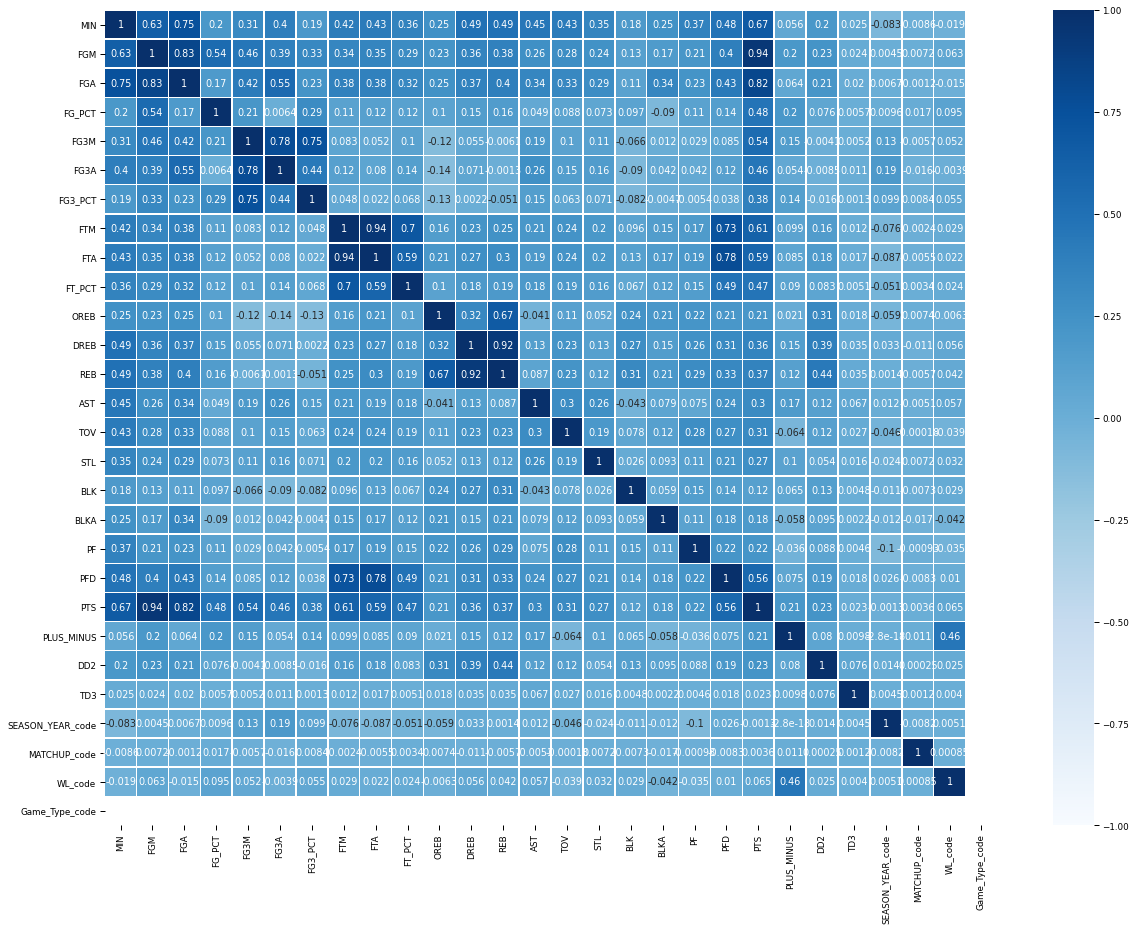

In [13]:
# import seaborn as sns
plt.figure(figsize=(20,15))
sns.set_context("paper", font_scale=1)

# sns.heatmap(df.corr(), annot=True, cmap='Blues',vmin=-1, vmax=1, square=False, linewidths=0.5)
print("")
print("Pre Season")
sns.heatmap(df_X_PreSeason.corr(), annot=True, cmap='Blues',vmin=-1, vmax=1, square=False, linewidths=0.5)
# display(df_X_PreSeason)



Regular Season


<AxesSubplot:>

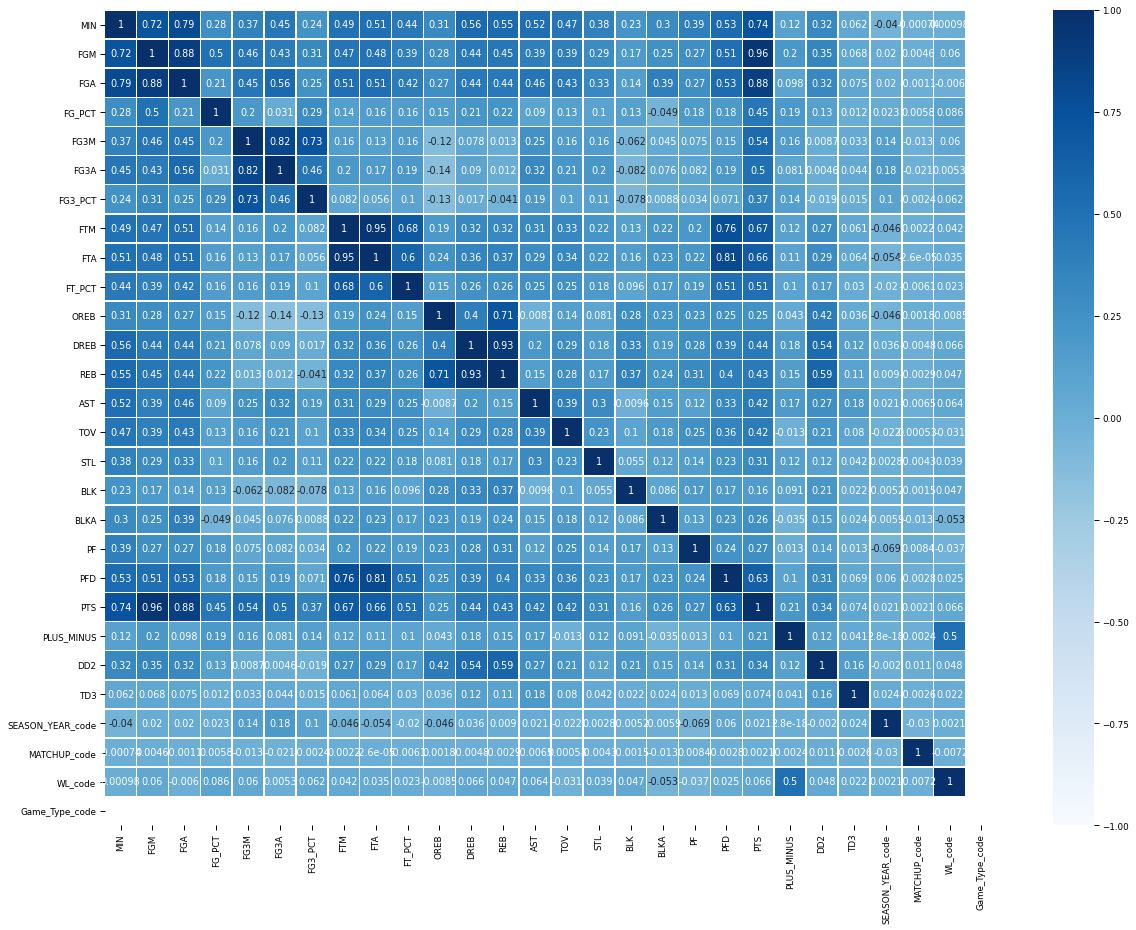

In [14]:
plt.figure(figsize=(20,15))
sns.set_context("paper", font_scale=1)
print("")
print("Regular Season")
sns.heatmap(df_X_RegularSeason.corr(), annot=True, cmap='Blues',vmin=-1, vmax=1, square=False, linewidths=0.5)
# display(df_X_RegularSeason)



Playoffs


<AxesSubplot:>

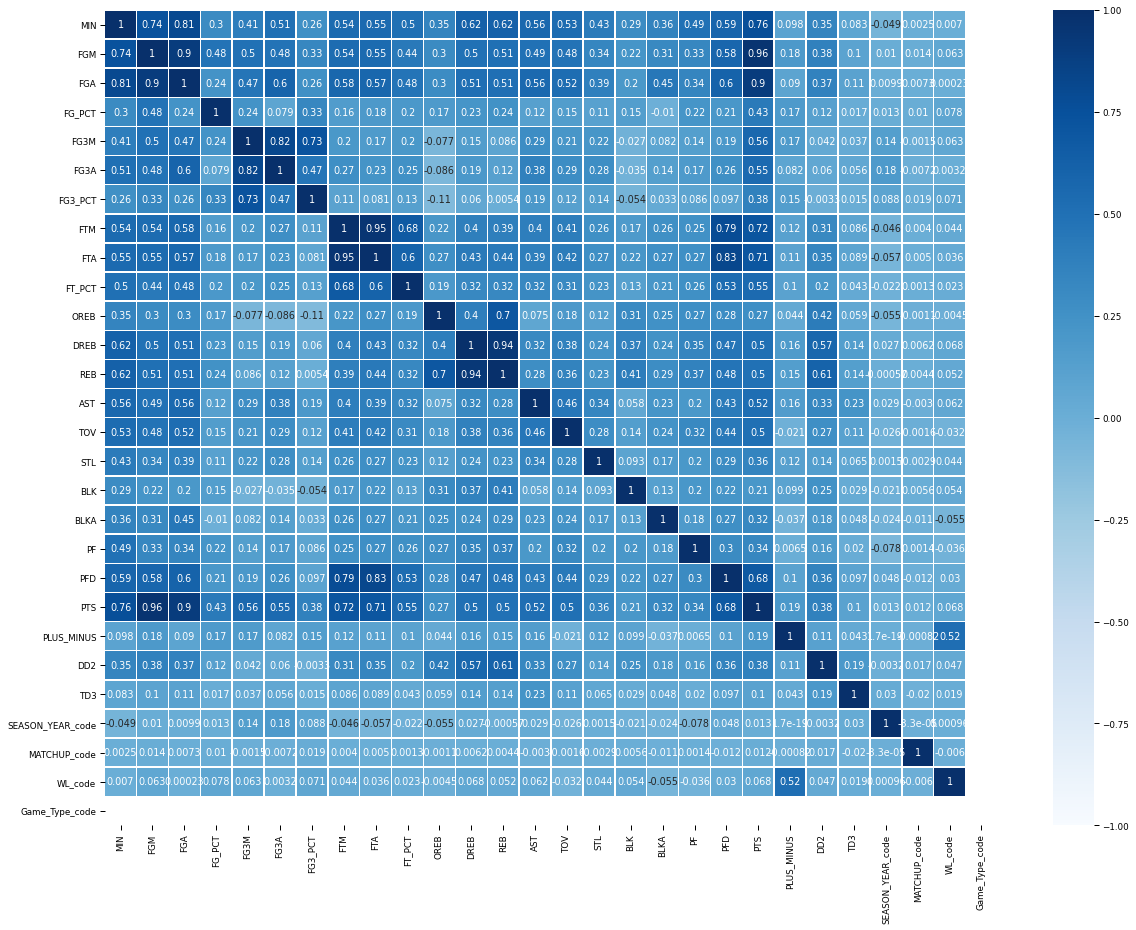

In [15]:
plt.figure(figsize=(20,15))
sns.set_context("paper", font_scale=1)
print("")
print("Playoffs")
sns.heatmap(df_X_Playoffs.corr(), annot=True, cmap='Blues',vmin=-1, vmax=1, square=False, linewidths=0.5)
# display(df_X_Playoffs)

## Section : Remove additional unwanted fields based on Heat Map / Correlation Matrix

## NOT ACTIVE

In [16]:
# # Remove unwanted/useless attributes
# unwanted_list_02 = []

# for k in unwanted_list_02:
#     X_headers_list.remove(k)

# # Remaining attributes
# # VALIDATION CODE 
# if debug_active == 'yes':
#     display(X_headers_list)

## Section : Re-check Heat Map / Correlation Matrix

## NOT ACTIVE

In [17]:
# Reuse code for previous Heat Maps

# Section : Modeling and Analysis

## Section : Prepare train and test data

In [22]:
# Select a season 
# gameTypeListed = ['Pre Season', 'Regular Season', 'Playoffs']
# gameTypeListed_code = [1, 2, 0]

gameType = 1
if gameType == 1:
    X = df_X_PreSeason
    Y = df_Y_PreSeason
elif gameType == 2:
    X = df_X_RegularSeason
    Y = df_Y_RegularSeason
elif gameType == 0:
    X = df_X_Playoffs
    Y = df_Y_Playoffs

# Split the code into training and test dataset 0.7/0.3
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = test_size_val, random_state = random_state_val)

# Validate the split at a high level
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(26644, 28) (26644, 1)
(11420, 28) (11420, 1)


In [30]:
# VALIDATION CODE 
if debug_active == 'yes':
    display(X)
    display(df_X_PreSeason)
    display(Y)
    display(df_Y_PreSeason)

,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,PF,PFD,PTS,PLUS_MINUS,DD2,TD3,SEASON_YEAR_code,MATCHUP_code,WL_code,Game_Type_code
26602,27.970000,4,10,0.400,0,0,0.000,1,1,1.0,...,3,4,9,14,0,0,1,836,0,1
26603,7.600000,1,3,0.333,0,0,0.000,0,0,0.0,...,0,0,2,4,0,0,1,2290,0,1
26604,27.733333,7,11,0.636,0,0,0.000,5,5,1.0,...,1,5,19,-7,0,0,1,2290,0,1
26605,10.660000,1,1,1.000,0,0,0.000,1,2,0.5,...,1,0,3,4,0,0,1,1312,1,1
26606,26.266667,4,14,0.286,0,2,0.000,1,2,0.5,...,1,1,9,-6,0,0,1,2330,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440973,23.116667,6,16,0.375,5,14,0.357,0,0,0.0,...,3,0,17,30,0,0,15,765,1,1
440974,15.833333,1,9,0.111,0,2,0.000,0,0,0.0,...,0,1,2,-26,0,0,15,2107,0,1
440975,17.750000,7,8,0.875,5,6,0.833,2,2,1.0,...,1,1,21,30,0,0,15,765,1,1
440976,15.066667,3,6,0.500,0,1,0.000,0,0,0.0,...,0,1,6,14,0,0,15,765,1,1


,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,PF,PFD,PTS,PLUS_MINUS,DD2,TD3,SEASON_YEAR_code,MATCHUP_code,WL_code,Game_Type_code
26602,27.970000,4,10,0.400,0,0,0.000,1,1,1.0,...,3,4,9,14,0,0,1,836,0,1
26603,7.600000,1,3,0.333,0,0,0.000,0,0,0.0,...,0,0,2,4,0,0,1,2290,0,1
26604,27.733333,7,11,0.636,0,0,0.000,5,5,1.0,...,1,5,19,-7,0,0,1,2290,0,1
26605,10.660000,1,1,1.000,0,0,0.000,1,2,0.5,...,1,0,3,4,0,0,1,1312,1,1
26606,26.266667,4,14,0.286,0,2,0.000,1,2,0.5,...,1,1,9,-6,0,0,1,2330,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440973,23.116667,6,16,0.375,5,14,0.357,0,0,0.0,...,3,0,17,30,0,0,15,765,1,1
440974,15.833333,1,9,0.111,0,2,0.000,0,0,0.0,...,0,1,2,-26,0,0,15,2107,0,1
440975,17.750000,7,8,0.875,5,6,0.833,2,2,1.0,...,1,1,21,30,0,0,15,765,1,1
440976,15.066667,3,6,0.500,0,1,0.000,0,0,0.0,...,0,1,6,14,0,0,15,765,1,1


,WL_code
26602,0
26603,0
26604,0
26605,1
26606,1
...,...
440973,1
440974,0
440975,1
440976,1


,WL_code
26602,0
26603,0
26604,0
26605,1
26606,1
...,...
440973,1
440974,0
440975,1
440976,1


# Section : Apply Logistic Regression on the split train/test dataset

In [34]:
# Notes
# LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
#                    intercept_scaling=1, l1_ratio=None, max_iter=100,
#                    multi_class='warn', n_jobs=None, penalty='l2',
#                    random_state=0, solver='liblinear', tol=0.0001, verbose=0,
#                    warm_start=False)

# Create the model
LogRegM = LogisticRegression(solver='liblinear', random_state = 0)

# Train the model
LogRegM.fit(X_train, Y_train).ravel()

# Predict using test data
Y_pred = LogRegM.predict(X_test)


C:\Users\Dennis\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AttributeError: 'LogisticRegression' object has no attribute 'ravel'

In [32]:
Y_pred = pd.DataFrame(Y_pred, columns = ["WL_code"])
# df = pd.DataFrame(data=numpy_data, index=["row1", "row2"], columns=["column1", "column2"])
# VALIDATION CODE 
if debug_active == 'yes':
    display(Y_pred)

,WL_code
0,1
1,1
2,1
3,1
4,0
...,...
11415,0
11416,1
11417,0
11418,0


## Confusion Matrix Analysis Notes
https://www.google.com/search?q=confusion+matrix&rlz=1C1GCEA_enCA849CA849&oq=confusion+&aqs=chrome.1.69i57j0i433l2j0j0i433j0l5.2966j0j7&sourceid=chrome&ie=UTF-8

## Analysis score notes 
https://stackoverflow.com/questions/31421413/how-to-compute-precision-recall-accuracy-and-f1-score-for-the-multiclass-case

### Compute your model’s analysis

In [25]:
accuracy_score_LogRegM = accuracy_score(Y_test, Y_pred)
f1_score_LogRegM = f1_score(Y_test, Y_pred)
recall_score_LogRegM = recall_score(Y_test, Y_pred)
precision_score_LogRegM = precision_score(Y_test, Y_pred)
classification_report_LogRegM = classification_report(Y_test, Y_pred)
confusion_matrix_LogRegM = confusion_matrix(Y_test, Y_pred)
cm = confusion_matrix_LogRegM
sensitivity_LogRegM = cm[0,0]/(cm[0,0]+cm[0,1])
specificity_LogRegM = cm[1,1]/(cm[1,0]+cm[1,1])

# VALIDATION CODE 
if debug_active == 'yes':
    print('Accuracy:', accuracy_score_LogRegM)
    print('F1 score:', f1_score_LogRegM)
    print('Recall:', recall_score_LogRegM)
    print('Precision:', precision_score_LogRegM)
    print('Sensitivity : ', sensitivity_LogRegM)
    print('Specificity : ', specificity_LogRegM)
    print('\n clasification report:\n', classification_report_LogRegM)
    print('\n confussion matrix:\n',confusion_matrix_LogRegM)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
# Feature Importance
importance = LogRegM.coef_[0]
array_importance=[]
# summarize feature importance
for i,v in enumerate(importance):
    array_importance.append(v)
    # print('Feature: %0d, Score: %.5f' % (i,v))

# # Convert to dataframe feature_importances results
df_feature_importance_values = pd.DataFrame(array_importance)
df_feature_importance_values.rename(columns={0:'Feature Importance'}, inplace=True)

# # Convert to dataframe feature labels
df_feature_names = pd.DataFrame(list(X.columns))
df_feature_names.rename(columns={0:'Feature'}, inplace=True)

# # Merge the dataframes for feature labels and feature_importances results
df_feature_importance_LogRegM = pd.concat([df_feature_names, df_feature_importance_values], axis=1)
# df_feature_importance

df_feature_importance_LogRegM.sort_values('Feature Importance', ascending=False, inplace=True)

# VALIDATION CODE 
if debug_active == 'yes':
    df_feature_importance_LogRegM

In [ ]:
print("Stop")

# DO NOT USE THIS CODE GOING FORWARD 

# Section 3a: Data Pull

In [ ]:
for seasonSelected in seasonsListed: 

    # For gameType in gameTypeListed:        
    for gameType in gameTypeListed:
        # Start counter for processing the current season
        start_time_counter_Season = time.time() 
        
        gamelogs_players = playergamelogs.PlayerGameLogs(season_nullable = seasonSelected, season_type_nullable = gameType)
        df_gamelogs_players_currSeason = pd.DataFrame(gamelogs_players.get_data_frames()[0])
        
        # Insert gameType column and list as one of the values in gameTypeListed
        df_gamelogs_players_currSeason['Game_Type'] = gameType
        if countFirstYear == 0:
            df_gamelogs_players = df_gamelogs_players_currSeason
            countFirstYear = 1
        else:
            # df_gamelogs_players = np.concatenate([df_gamelogs_players, df_gamelogs_players_currSeason])
            df_gamelogs_players = pd.concat([df_gamelogs_players, df_gamelogs_players_currSeason],ignore_index=True)
            # df_gamelogs_players = df_gamelogs_players.append(df_gamelogs_players_currSeason)

        time_took_Season = time.time() - start_time_counter_Season
        print("")
        print("Processed: Season =", seasonSelected, "| Game_Type =", gameType, "| ",  f"Process time: {hms_string(time_took_Season)}")
        # print(f"Process time: {hms_string(time_took_Season)}")
        time.sleep(2) 

# Section 3b: Cleanse the data of NBA Fantasy columns

In [ ]:
df = df_gamelogs_players

# Remove unwanted/useless attributes
unwanted_list = ['NBA_FANTASY_PTS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK'
, 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK'
, 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK'
, 'PTS_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK', 'DD2_RANK', 'TD3_RANK']

# Define the possible list of features that could predict the TARGET 
X_headers_list = df.columns.tolist()

for x in unwanted_list:
    X_headers_list.remove(x)

# Display current dataframe
df = df[X_headers_list]

df_gamelogs_players = df

# VALIDATION CODE 
if debug_active == 'yes':
    display(df_gamelogs_players)

# Section 4: Export data to CSV

In [ ]:
#Save the data to the same folder that contains the notebook, example will be named 'Jamal Murray2019.csv'
# Setup file name for CSV
filename = './HistoricalGameLogs_'
# filename = filename + seasonStart + '_to_' + seasonEnd + '_' + gameType + '.csv'
filename = filename + seasonStart + '_to_' + seasonEnd + '_ALL' + '.csv'

df_gamelogs_players.to_csv(filename)

time_took = time.time() - start_time
print("")
print("")
print("PROCESSING COMPLETE")
print(f"Total Runtime: {hms_string(time_took)}")

# End of Code